In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
import datetime
#import gspread

In [2]:
SPOTIPY_CLIENT_ID = '0c4df4418a2e4290b3a4d7751665a215'
SPOTIPY_CLIENT_SECRET = 'ef84184c71b54774ab7cd04998973eca'
SPOTIPY_REDIRECT_URI = "http://127.0.0.1:9090/"
#SCOPE = 'user-top-read'

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID, 
                                               client_secret=SPOTIPY_CLIENT_SECRET, 
                                               redirect_uri=SPOTIPY_REDIRECT_URI 
                                               ))

#top_tracks_short = sp.current_user_top_tracks(limit=10, offset=0, time_range="short_term")

In [31]:
top_tracks_short = sp.current_user_top_tracks(limit=10, offset=0, time_range="long_term")

In [9]:
top_artists_short = sp.current_user_top_artists(limit=10, offset=0, time_range="medium_term")

In [11]:
top_artists_short

{'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
   'followers': {'href': None, 'total': 40857039},
   'genres': ['canadian contemporary r&b', 'canadian pop', 'pop'],
   'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
   'id': '1Xyo4u8uXC1ZmMpatF05PJ',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5eb2f71b65ef483ed75a8b40437',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab676161000051742f71b65ef483ed75a8b40437',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f1782f71b65ef483ed75a8b40437',
     'width': 160}],
   'name': 'The Weeknd',
   'popularity': 100,
   'type': 'artist',
   'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
   'followers': {'href': None, 'total': 74720713},
   'genres': ['dance pop', 'pop'],
   'hre

In [12]:
top_artists_short['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
 'followers': {'href': None, 'total': 40857039},
 'genres': ['canadian contemporary r&b', 'canadian pop', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
 'id': '1Xyo4u8uXC1ZmMpatF05PJ',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb2f71b65ef483ed75a8b40437',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051742f71b65ef483ed75a8b40437',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1782f71b65ef483ed75a8b40437',
   'width': 160}],
 'name': 'The Weeknd',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}

In [10]:
for artist in top_artists_short['items']:
    print(artist['name'])

The Weeknd
Ariana Grande
Billie Eilish
Kanye West
Adele
Olivia Rodrigo
James Blake
Doja Cat
Drake
Nicholas Britell


In [32]:
for track in top_tracks_short['items']:
    print(track['name'])

safety net (feat. Ty Dolla $ign)
Lo Vas A Olvidar (with ROSALÍA)
everything i wanted
Toxic
in my head
No Time To Die
Monster (Shawn Mendes & Justin Bieber)
ALREADY
Diamonds
you broke me first


In [13]:
top_tracks_short = sp.current_user_top_tracks(limit=20, offset=0, time_range="short_term")

In [14]:
def get_track_ids(returned_data):
    track_ids = []
    for track in returned_data['items']:
        track_ids.append(track['id'])
    return track_ids

In [15]:
top_track_ids = get_track_ids(top_tracks_short)

In [16]:
top_track_ids

['4PgQu8CWZAD6NSqd4mGDmE',
 '4pQx11xYo2rNP5HdOoaLgt',
 '1E5Xu8dur0fAjSP1VpVhAZ',
 '1CrPPsibP3uTc3DSI5vQC5',
 '0mL82sxCRjrs3br407IdJh',
 '6a88fc0zSrVWGPdoj445nJ',
 '6zzdyvVWjGrQBraSvuqJPY',
 '5IgjP7X4th6nMNDh4akUHb',
 '0zCgWGmDF0aih5qexATyBn',
 '5kcvBnt6DPX3AMEsCx1qDh',
 '3QPBocWfIcOCdFFvmqn60F',
 '3vJcz8exedHCjQ9ed95NqU',
 '4wcBRRpIfesgcyUtis7PEg',
 '2D4dV2KXDTszzJ3p3cFqhA',
 '1nH2PkJL1XoUq8oE6tBZoU',
 '0Uru1UoJdHKf2lxssQT3kC',
 '6a4GH1gljLL7VvmO9u5O92',
 '7y3xU9vEC1s8DSuuoSYKih',
 '3PHx91cSFc4vNVP7TpICVt',
 '1NlK2NtpuUazpziLhnJwEV']

In [27]:
def get_track_features(id):
    meta = sp.track(id)
    audio_feat = sp.audio_features(id)
    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    spotify_url = meta['external_urls']['spotify']
    album_cover = meta['album']['images'][0]['url']
    
    danceability = audio_feat[0]['danceability']
    duration_ms = audio_feat[0]['duration_ms']
    
    track_info = [name, album, artist, spotify_url, album_cover, danceability, duration_ms]
    
    return track_info

In [28]:
get_track_features('4PgQu8CWZAD6NSqd4mGDmE')

['Succession (Main Title Theme) - Extended Intro Version',
 'Succession: Season 2 (Music from the HBO Series)',
 'Nicholas Britell',
 'https://open.spotify.com/track/4PgQu8CWZAD6NSqd4mGDmE',
 'https://i.scdn.co/image/ab67616d0000b2732acc1c24eeea64f07cf99b17',
 0.332,
 112613]

In [29]:
# loop over track ids 
tracks = []
for i in range(len(top_track_ids)):
    time.sleep(.5)
    track = get_track_features(top_track_ids[i])
    tracks.append(track)

In [ ]:
tracks

In [30]:
# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'spotify_url', 'album_cover', 'danceability', 'duration_ms'])
df.head(5)

,name,album,artist,spotify_url,album_cover,danceability,duration_ms
0,Succession (Main Title Theme) - Extended Intro...,Succession: Season 2 (Music from the HBO Series),Nicholas Britell,https://open.spotify.com/track/4PgQu8CWZAD6NSq...,https://i.scdn.co/image/ab67616d0000b2732acc1c...,0.332,112613
1,Cowboys,Charlotte,Charlotte Lawrence,https://open.spotify.com/track/4pQx11xYo2rNP5H...,https://i.scdn.co/image/ab67616d0000b273a2bb57...,0.363,238654
2,Best Friends,Dawn FM,The Weeknd,https://open.spotify.com/track/1E5Xu8dur0fAjSP...,https://i.scdn.co/image/ab67616d0000b2734ab252...,0.737,163504
3,fue mejor (feat. SZA),fue mejor (feat. SZA),Kali Uchis,https://open.spotify.com/track/1CrPPsibP3uTc3D...,https://i.scdn.co/image/ab67616d0000b2736a7b60...,0.769,230965
4,Is There Someone Else?,Dawn FM,The Weeknd,https://open.spotify.com/track/0mL82sxCRjrs3br...,https://i.scdn.co/image/ab67616d0000b2734ab252...,0.702,199111


In [18]:
track = sp.track('4PgQu8CWZAD6NSqd4mGDmE')

In [19]:
track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/18oYqNtcLUHrqO7LfX7qni'},
    'href': 'https://api.spotify.com/v1/artists/18oYqNtcLUHrqO7LfX7qni',
    'id': '18oYqNtcLUHrqO7LfX7qni',
    'name': 'Nicholas Britell',
    'type': 'artist',
    'uri': 'spotify:artist:18oYqNtcLUHrqO7LfX7qni'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   '

In [24]:
sp.audio_features('4PgQu8CWZAD6NSqd4mGDmE')[0]['duration_ms']

112613

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

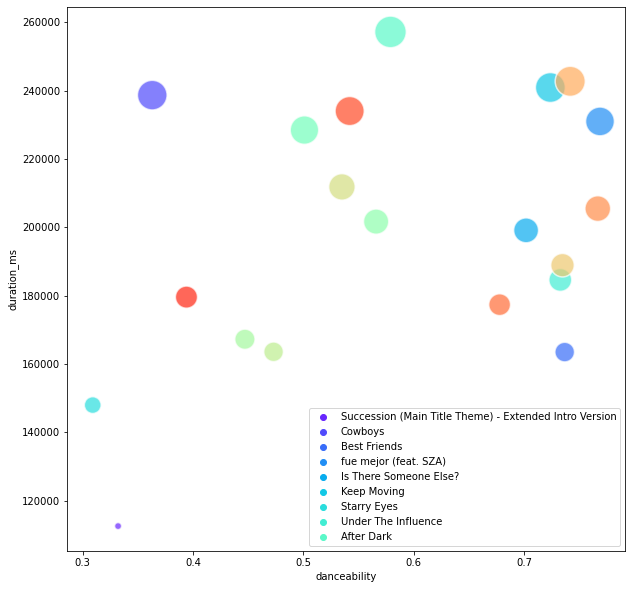

In [34]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df, x='danceability', y='duration_ms', 
                     hue='name', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)